In [1]:
import pandas as pd
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train # 간, 온도, 습도, 계절 등의 정보가 담긴 데이터 이다. 이를 통해 자전거의 대여량을 예측하고자 한다. 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
# datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

'\nyear, month, day, hour, minute, second 데이터 개수 시각화하기\nsns.countplot 활용해서 시각화하기\nsubplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기\n'

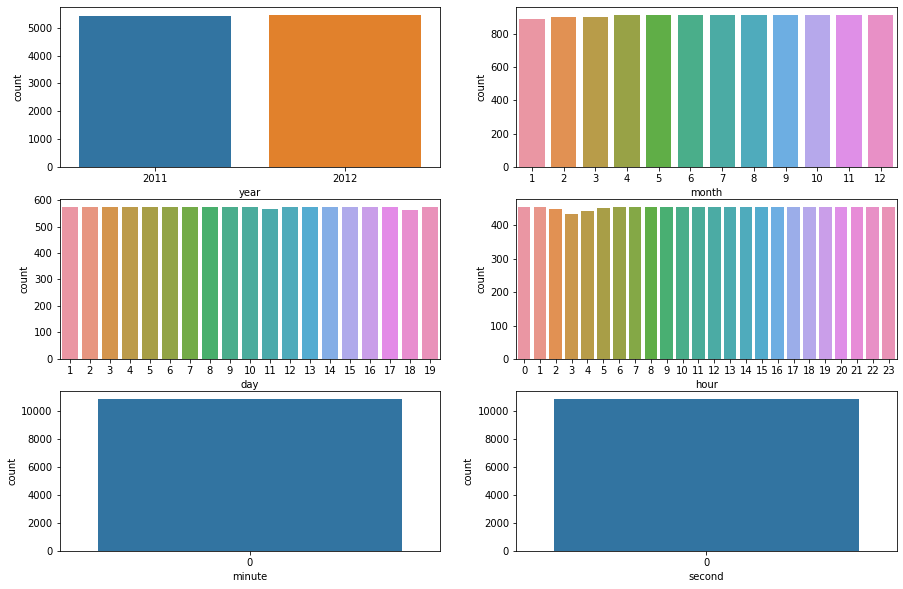

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3,2,figsize=(15,10))
sns.countplot(x='year', data=train, ax=axes[0,0])
sns.countplot(x='month', data=train, ax=axes[0,1])
sns.countplot(x='day', data=train, ax=axes[1,0])
sns.countplot(x='hour', data=train, ax=axes[1,1])
sns.countplot(x='minute', data=train, ax=axes[2,0])
sns.countplot(x='second', data=train, ax=axes[2,1])
'''
year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
'''

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [22]:
X = train[['season','holiday','weather','temp','humidity']].values
y = train['count'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=33)
'''
X 칼럼에는 계절, 휴일여부, 날씨, 온도, 습도 칼럼을 넣었다
대여량을 예측 하는 것이 목표 -> y 변수에 count 컬럼의 데이터 넣기
X, y 컬럼 선택 및 train/test 데이터 분리
'''

'\nX 칼럼에는 계절, 휴일여부, 날씨, 온도, 습도 칼럼을 넣었다\n대여량을 예측 하는 것이 목표 -> y 변수에 count 컬럼의 데이터 넣기\nX, y 컬럼 선택 및 train/test 데이터 분리\n'

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train) # sklearn의 LinearRegression 모델 불러오기 및 학습하기

LinearRegression()

In [24]:
predictions = model.predict(X_test)
predictions # 학습된 모델에 X_test를 입력해서 예측값 출력하기

array([227.7657692 , 225.76612036,  95.70037132, ..., 138.37279238,
       101.62168796, 208.65406084])

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
rmse = mse ** 0.5 
print(mse,rmse) # 모델이 예측한 값과 정답 target 간의 손실함수 값 계산, mse 값과 함께 rmse 값도 계산

24617.908560333595 156.9009514322128


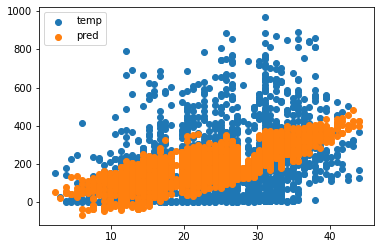

In [26]:
plt.scatter(X_test[:, 3], y_test, label="temp")
plt.scatter(X_test[:, 3], predictions, label="pred")
plt.legend()
plt.show() # x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기

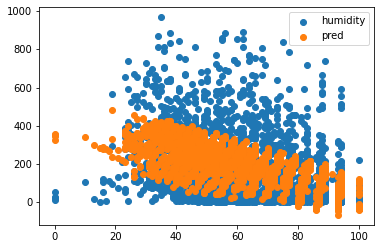

In [27]:
plt.scatter(X_test[:, 4], y_test, label="humidity")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.legend()
plt.show() # x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기